### Let us start by importing the necessary modules.

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  

#### Before we dive deep into the exploratory analysis, let us know a little more about the files given. To understand it better, let us first read all the files as dataframe objects and then look at the top few rows.

In [27]:
order_products_train_df = pd.read_csv("C:\\Users\\User\\Documents\\Office Works\\instacart-market-basket-analysis\\Dataset\\order_products__train.csv")
order_products_prior_df = pd.read_csv("C:\\Users\\User\\Documents\\Office Works\\instacart-market-basket-analysis\\Dataset\\order_products__prior.csv")
orders_df = pd.read_csv("C:\\Users\\User\\Documents\\Office Works\\instacart-market-basket-analysis\\Dataset\\orders.csv")
products_df = pd.read_csv("C:\\Users\\User\\Documents\\Office Works\\instacart-market-basket-analysis\\Dataset\\products.csv")
aisles_df = pd.read_csv("C:\\Users\\User\\Documents\\Office Works\\instacart-market-basket-analysis\\Dataset\\aisles.csv")
departments_df = pd.read_csv("C:\\Users\\User\\Documents\\Office Works\\instacart-market-basket-analysis\\Dataset\\departments.csv")

In [28]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [29]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [30]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [31]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [32]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [33]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Exploratory Analysis

### Let's validate the claim that 4 to 100 orders of a customer are given

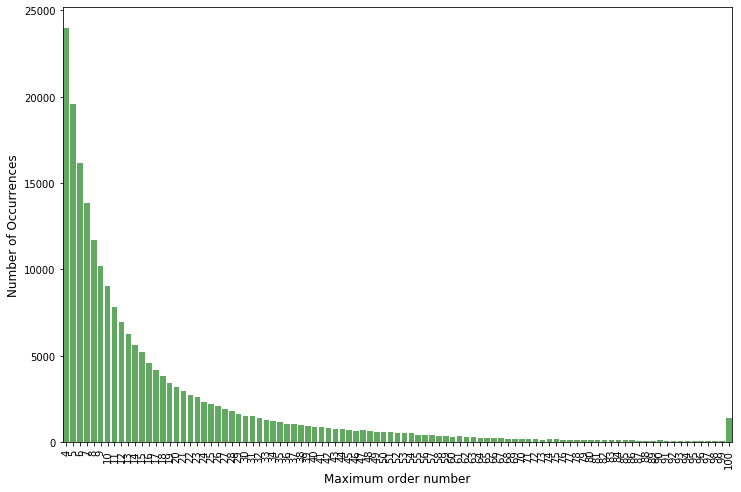

In [34]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

*As stated in the problem description, there are no orders less than 4 and is max capped at 100.*

### Let's see how ordering habit changes w.r.t day of week & hour of day

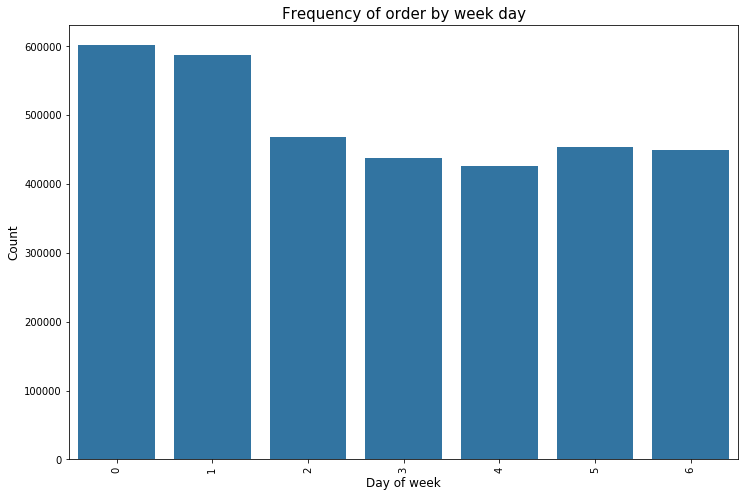

In [35]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

**Frequency of order by day of week-** 0 and 1 represents Saturday and Sunday when the orders are high and low during Wednesday

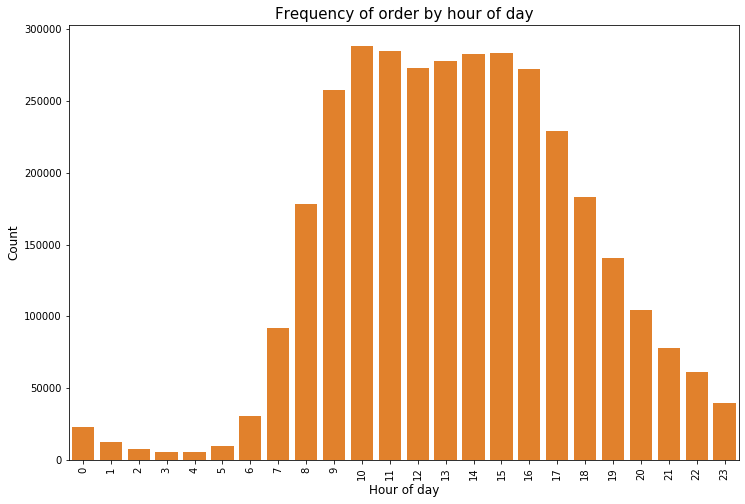

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

**Frequency of order by hour of day-** Majority of the purchases are made during day time, i.e. between 10 am to 4 pm.

### Let's combine the day of week & hour of day to see the distribution

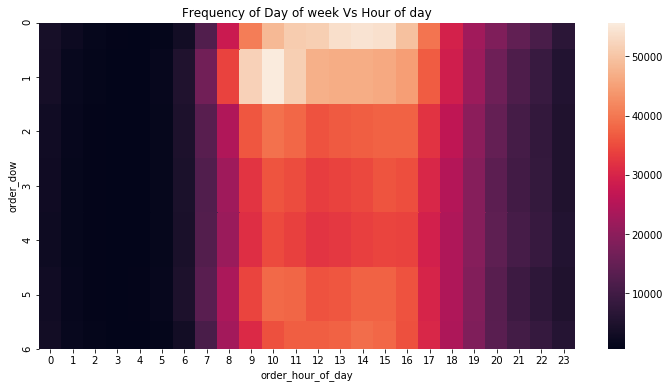

In [37]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

From the graph, we can see that **Saturday evenings and Sunday mornings** are the prime time for customers to make orders.

### Let's see the time interval between previous & present orders

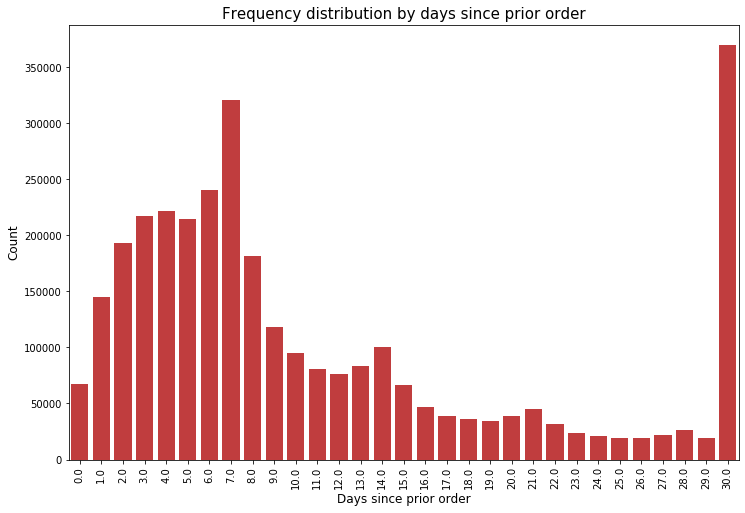

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

- Graph states that customers order **once in every week** (peak at 7 days) or **once in a month** (peak at 30 days).
- Also, we can see that there are smaller peaks at 14, 21 and 28 days (weekly intervals).

### Let's see no. of products bought in each order

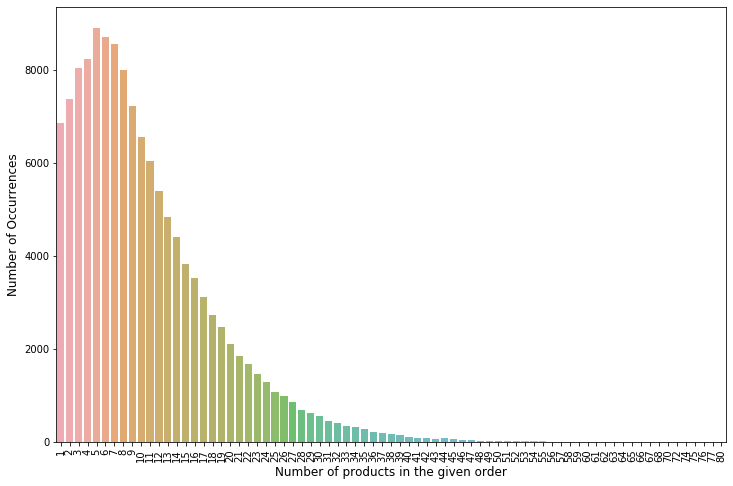

In [39]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

- We can observe from the plot that people usually **order around 5 products**.
- In particular, the **top 5 most ordered products** are Banana (491,291), Bag of Organic Banana (394,930), Organic Strawberries (275,577), Organic Baby Spinach (251,705), and Organic Hats Avocado (220,877).

### Now let's look at the important aisles and department distribution

#### Now let us merge these product details with the order_prior details.

In [40]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


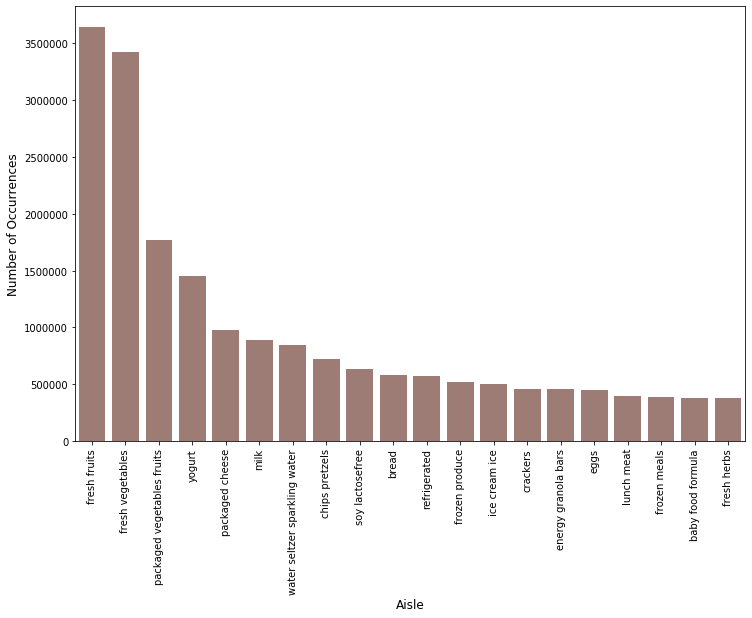

In [41]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

**Top aisles** are fresh fruits, fresh vegetables, packaged vegetables and fruit, followed by yogurt and packaged cheese.

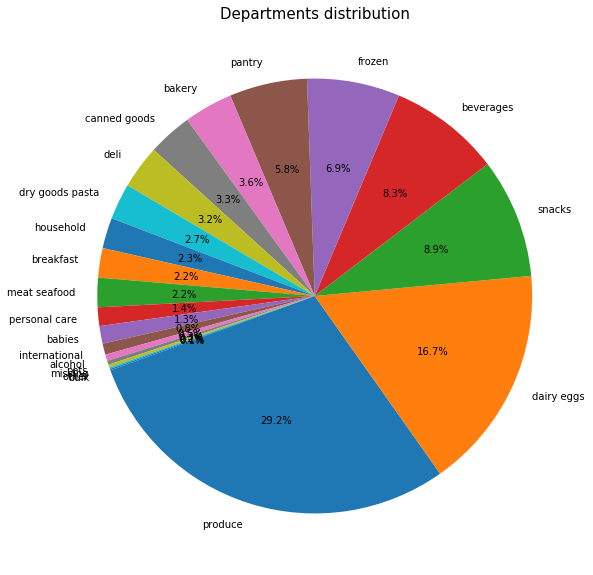

In [42]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

The **top department** is produce, followed by dairy eggs and snacks.

### Now let's look at reorder ratio of each Department

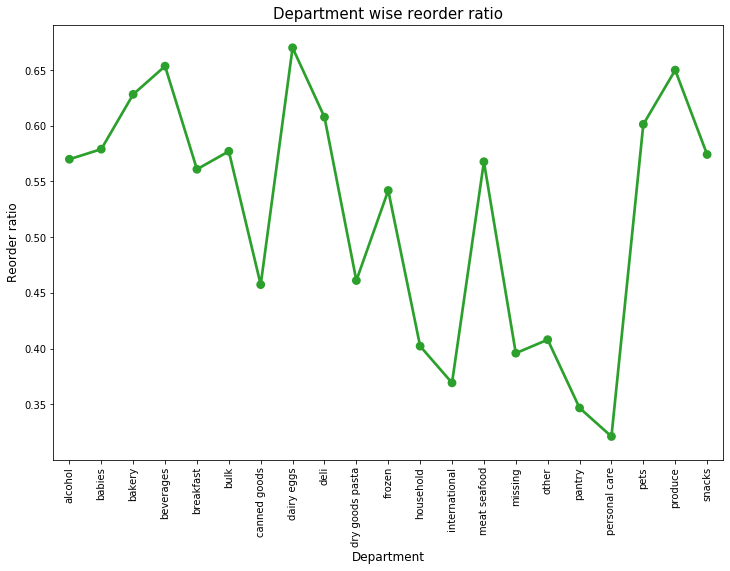

In [43]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

From the point plot, we can find that Personal care has lowest reorder ratio and **dairy eggs has highest reorder ratio**.

### Let's look at the cart order vs the reorder ratio

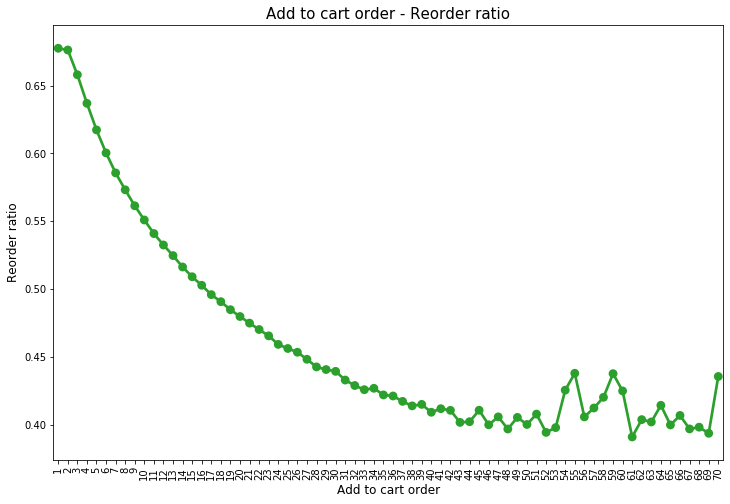

In [44]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

- We can see that the **products that are added to the cart initially are the ones that are likely to be reordered again** compared to the ones added later. 
- This makes sense to as we tend to first order all the products we used to buy frequently and then look out for new products available.

## Conclusion
- The dataset is quite big and has many variables that we can analyze. We can further look at association rules in detail between products, investigate consumer reordering patterns in terms of days and hours, reorder ratio vs the hour of the order and so on…